In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Generate synthetic data
np.random.seed(42)
X1 = 30 * np.random.rand(100, 1)  # temperature
X2 = 100 * np.random.rand(100, 1)  # humidity
X3 = 800 * np.random.rand(100, 1)  # sunlight intensity
X = np.concatenate((X1, X2, X3), axis=1)


# Linear relationship: power_output = 2*temperature + 3*humidity + 4*sunlight_intensity + noise
y = 2*X1 + 3*X2 + 4*X3 + np.random.randn(100, 1)


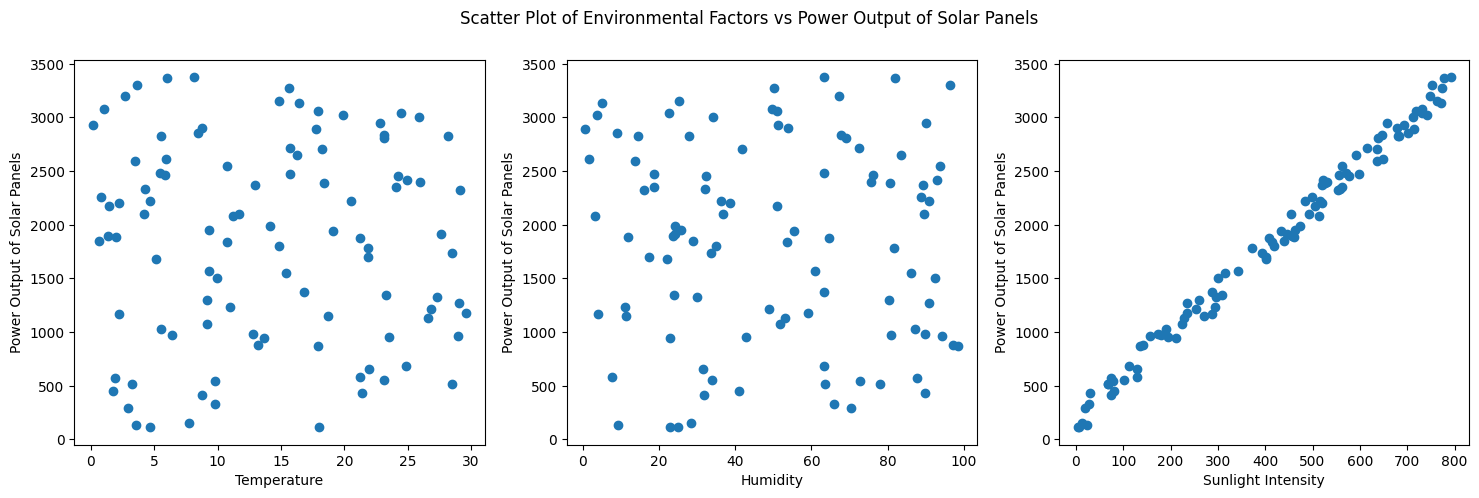

In [3]:
# Visualize the relationship between features and target
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for i in range(3):
    axs[i].scatter(X[:, i], y)
    axs[i].set_xlabel(f'{["Temperature", "Humidity", "Sunlight Intensity"][i]}')
    axs[i].set_ylabel('Power Output of Solar Panels')

plt.suptitle('Scatter Plot of Environmental Factors vs Power Output of Solar Panels')
plt.show()


In [4]:
def gradient_descent(X, y, learning_rate=0.1, iterations=1000):
    m = len(X)
    theta = np.random.randn(X.shape[1], 1)

    for iteration in range(iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients

    return theta
X_normalized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

X_b = np.c_[np.ones((100, 1)), X_normalized]  # add bias term
theta = gradient_descent(X_b, y, learning_rate=0.1)
print("Optimal Parameters (theta):", theta)

Optimal Parameters (theta): [[1833.95444772]
 [  17.88300792]
 [  87.55342604]
 [ 934.35352953]]


In [5]:
# Predict power output for a new set of environmental factors
new_environment = np.array([[25, 70, 700]])  # temperature, humidity, sunlight intensity
new_environment_b = np.c_[np.ones((1, 1)), new_environment]  # add bias term
predicted_power_output = new_environment_b.dot(theta)
print("Predicted Power Output of Solar Panels:", predicted_power_output[0][0], "watts")


Predicted Power Output of Solar Panels: 662457.2401379797 watts


# Option 2

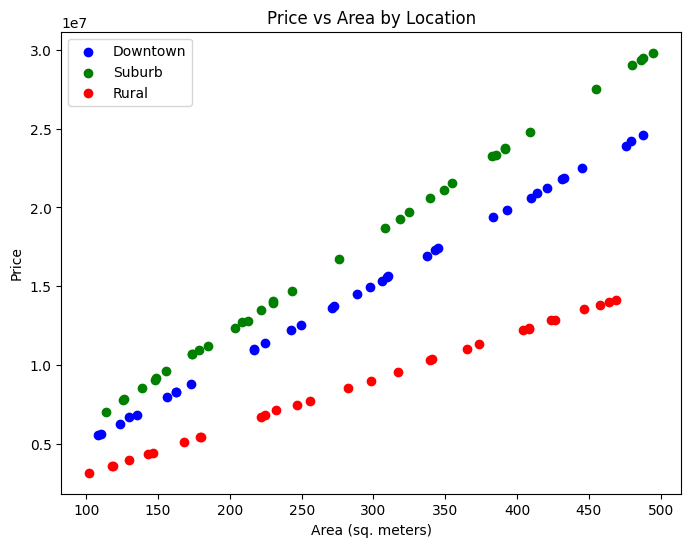

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data with location feature
np.random.seed(42)
num_samples = 100
area = 100 + 400 * np.random.rand(num_samples, 1)  # area (in square meters)
bedrooms = np.random.randint(1, 6, (num_samples, 1))  # number of bedrooms
bathrooms = np.random.randint(1, 5, (num_samples, 1))  # number of bathrooms
locations = np.random.choice(['Downtown', 'Suburb', 'Rural'], size=(num_samples, 1))  # location of the property

# One-hot encode location
X_locations = np.zeros((num_samples, 3))
for i, loc in enumerate(['Downtown', 'Suburb', 'Rural']):
    X_locations[:, i] = (locations == loc).astype(int).ravel()

# Combine features
X = np.concatenate((area, bedrooms, bathrooms, X_locations), axis=1)

# Linear relationship: price = 50,000 * area + 30,000 * bedrooms + 20,000 * bathrooms + noise
price_suburb = 60000 * area + 40000 * bedrooms + 30000 * bathrooms + np.random.randn(num_samples, 1) * 10000
price_downtown = 50000 * area + 30000 * bedrooms + 20000 * bathrooms + np.random.randn(num_samples, 1) * 10000
price_rural = 30000 * area + 20000 * bedrooms + 15000 * bathrooms + np.random.randn(num_samples, 1) * 10000

# Visualize the relationship between location and price
plt.figure(figsize=(8, 6))
for loc, color, price in zip(['Downtown', 'Suburb', 'Rural'], ['blue', 'green', 'red'], [price_downtown, price_suburb, price_rural]):
    indices = np.where(locations == loc)[0]
    plt.scatter(area[indices], price[indices], label=loc, color=color)
plt.xlabel('Area (sq. meters)')
plt.ylabel('Price')
plt.title('Price vs Area by Location')
plt.legend()
plt.show()


In [7]:
# Combine prices based on location
price = np.where(locations == 'Suburb', price_suburb,
                 np.where(locations == 'Downtown', price_downtown, price_rural))

# Feature Scaling (Normalization)
X_scaled = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

In [8]:

# Train the Model
def gradient_descent(X, y, learning_rate=0.1, iterations=1000):
    m = len(X)
    theta = np.random.randn(X.shape[1], 1)

    for iteration in range(iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients

    return theta

X_b = np.c_[np.ones((num_samples, 1)), X_scaled]  # add bias term
theta = gradient_descent(X_b, price, learning_rate=0.1, iterations=1000)


In [9]:
# Make Predictions
# Predict price for a new house
new_house = np.array([[300, 3, 2, 'Suburb']])  # area, bedrooms, bathrooms, location

# One-hot encode location for the new house
new_location = np.zeros((1, 3))
for i, loc in enumerate(['Downtown', 'Suburb', 'Rural']):
    if new_house[0][-1] == loc:
        new_location[0, i] = 1

new_house_features = np.array([[new_house[0][0], new_house[0][1], new_house[0][2]]], dtype=float)  # area, bedrooms, bathrooms
new_house_b = np.concatenate((np.ones((1, 1), dtype=float), new_house_features, new_location), axis=1)  # add bias term

predicted_price = new_house_b.dot(theta)
print("Predicted Price of the House:", predicted_price[0, 0])


Predicted Price of the House: 5581577209.246877


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data with location feature
np.random.seed(42)
num_samples = 100
area = 100 + 400 * np.random.rand(num_samples, 1)  # area (in square meters)
bedrooms = np.random.randint(1, 6, (num_samples, 1))  # number of bedrooms
bathrooms = np.random.randint(1, 5, (num_samples, 1))  # number of bathrooms
locations = np.random.choice(['Downtown', 'Suburb', 'Rural'], size=(num_samples, 1))  # location of the property

# One-hot encode location
X_locations = np.zeros((num_samples, 3))
for i, loc in enumerate(['Downtown', 'Suburb', 'Rural']):
    X_locations[:, i] = (locations == loc).astype(int).ravel()

# Combine features
X = np.concatenate((area, bedrooms, bathrooms, X_locations), axis=1)

# Linear relationship: price = 50,000 * area + 30,000 * bedrooms + 20,000 * bathrooms + noise
price_suburb = 60000 * area + 40000 * bedrooms + 30000 * bathrooms + np.random.randn(num_samples, 1) * 10000
price_downtown = 50000 * area + 30000 * bedrooms + 20000 * bathrooms + np.random.randn(num_samples, 1) * 10000
price_rural = 30000 * area + 20000 * bedrooms + 15000 * bathrooms + np.random.randn(num_samples, 1) * 10000

# Combine prices based on location
price = np.where(locations == 'Suburb', price_suburb,
                 np.where(locations == 'Downtown', price_downtown, price_rural))

# Feature Scaling (Normalization)
X_scaled = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

# Train the Model
def gradient_descent(X, y, learning_rate=0.1, iterations=1000):
    m = len(X)
    theta = np.random.randn(X.shape[1], 1)

    for iteration in range(iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients

    return theta

X_b = np.c_[np.ones((num_samples, 1)), X_scaled]  # add bias term
theta = gradient_descent(X_b, price, learning_rate=0.1, iterations=1000)

# Make Predictions
# Predict price for a new house
new_house = np.array([[300, 3, 2, 'Suburb']])  # area, bedrooms, bathrooms, location

# One-hot encode location for the new house
new_location = np.zeros((1, 3))
for i, loc in enumerate(['Downtown', 'Suburb', 'Rural']):
    if new_house[0][-1] == loc:
        new_location[0, i] = 1

new_house_features = np.array([[new_house[0][0], new_house[0][1], new_house[0][2]]])  # area, bedrooms, bathrooms

# Normalize features (excluding location)
X_features = X[:, :3]
X_min = np.min(X_features, axis=0).astype(float)
X_max = np.max(X_features, axis=0).astype(float)

# Normalize new_house_features
normalized_new_house_features = (new_house_features.astype(float) - X_min) / (X_max - X_min)

new_house_b = np.concatenate((np.ones((1, 1)), normalized_new_house_features, new_location), axis=1)  # add bias term

predicted_price = new_house_b.dot(theta)
print("Predicted Price of the House:", predicted_price[0][0])


Predicted Price of the House: 18085944.752081092
